# Transport Mean Profile Comparison
*Akira Di Sandro, 7/16/20*
<br> In this notebook, I will be making a mean profile of transport for the model data. I hope to then use a similar method to plot the mean profile for the observational data. then I hope to combine the two into one plot for comparison and narrow down where I want to make comparisons for transport in terms of depth.

## 1. Import Packages as usual

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import xarray as xr
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sectionate

## 2. Open Dataset & Load in 'ocean_static.nc'

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [4]:
dog = col.search(source_id='GFDL-CM4', experiment_id='historical', variable_id=['uo','vo'], grid_label='gn')
dog.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,uo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701
1,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,vo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701


In [5]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

In [6]:
grid = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']
grid

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 1980, x: 1440, y: 1080)
Coordinates:
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * bnds       (bnds) float64 1.0 2.0
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    uo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
    vo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
Attributes:
    institution_id:          NOAA-GFDL
    data_specs_version:      01.00.27
    parent_activity_id:      CMIP
    variant_label:           r1i1p1f1
    branch_method:           standard
    initialization_index:    1
    source_id:               GFDL-CM4
    sub_experiment_id:       none
    branch_time_in_child:    0.0
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    grid_label:              gn
    nominal_resolution:      25 km
    mip_era:                 CMIP6
    experiment:              historical
    parent_variant_label:    r1i1p1f1
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    parent_time_units:       days since 0001-1-1
    comment:                 <null ref>
    contact:                 gfdl.climate.model.info@noaa.gov
    sub_experiment:          none
    product:                 model-output
    frequency:               mon
    variant_info:            N/A
    parent_mip_era:          CMIP6
    activity_id:             CMIP
    institution:             National Oceanic and Atmospheric Administration,...
    realization_index:       1
    status:                  2019-08-06;created;by nhn2@columbia.edu
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    table_id:                Omon
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    parent_experiment_id:    piControl
    references:              see further_info_url attribute
    branch_time_in_parent:   36500.0
    experiment_id:           historical
    source_type:             AOGCM
    tracking_id:             hdl:21.14100/d0ebcd36-d2cd-442e-a8d9-8f7a27168a2...
    realm:                   ocean
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    parent_source_id:        GFDL-CM4
    history:                 File was processed by fremetar (GFDL analog of C...
    physics_index:           1
    forcing_index:           1
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn

In [7]:
o_s = xr.open_dataset('Data Files/ocean_static.nc')
o_s

<xarray.Dataset>
Dimensions:       (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time          (time) object 1900-01-01 00:00:00
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    areacello     (yh, xh) float32 ...
    deptho        (yh, xh) float32 ...
    hfgeou        (yh, xh) float32 ...
    sftof         (yh, xh) float32 ...
    Coriolis      (yq, xq) float32 ...
    geolon        (yh, xh) float32 ...
    geolat        (yh, xh) float32 ...
    geolon_c      (yq, xq) float32 ...
    geolat_c      (yq, xq) float32 ...
    geolon_u      (yh, xq) float32 ...
    geolat_u      (yh, xq) float32 ...
    geolon_v      (yq, xh) float32 ...
    geolat_v      (yq, xh) float32 ...
    wet           (yh, xh) float32 ...
    wet_c         (yq, xq) float32 ...
    wet_u         (yh, xq) float32 ...
    wet_v         (yq, xh) float32 ...
    dxt           (yh, xh) float32 ...
    dyt           (yh, xh) float32 ...
    dxCu          (yh, xq) float32 ...
    dyCu          (yh, xq) float32 ...
    dxCv          (yq, xh) float32 ...
    dyCv          (yq, xh) float32 ...
    areacello_cu  (yh, xq) float32 ...
    areacello_cv  (yq, xh) float32 ...
    areacello_bu  (yq, xq) float32 ...
    basin         (yh, xh) int32 ...
Attributes:
    filename:   19000101.ocean_static.nc
    title:      OM4_SIS2_cgrid_025
    grid_type:  regular
    grid_tile:  N/A

In [8]:
dxCv = o_s['dxCv']
dyCu = o_s['dyCu']
geolon_u = o_s['geolon_u']
geolat_u = o_s['geolat_u']
geolon_v = o_s['geolon_v']
geolat_v = o_s['geolat_v']

## 3. Open Cluster 

In [9]:
from dask.distributed import Client
from dask_gateway import Gateway


gateway = Gateway()  # connect to Gateway

cluster = gateway.new_cluster()  # create cluster
cluster.scale(10)  # scale cluster

client = Client(cluster)  # connect Client to Cluster

In [10]:
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.871f92a7bc18434d86616de50a0c9a71 Dashboard: https://us-central1-b.gcp.pangeo.io/services/dask-gateway/clusters/prod.871f92a7bc18434d86616de50a0c9a71/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


## 4. UVdata Calculations

The following are the lat and lon from the observational data. I had to adjust the values so that they are in similar places and are still on land for the model data.
<br> (-4.78819598936245, 152.903)
<br> (-5.137642131304778, 154.555)

In [11]:
lat1 = -4.78819598936245
lon1 = -208.21236
lat2 = -5.989064
lon2 = -205.234668

In [12]:
#isec, jsec, xsec, ysec = sectionate.create_section(grid['lon'], grid['lat'], lon1, lat1, lon2, lat2)

In [13]:
isec = np.array([367, 368, 369, 369, 370, 371, 372, 372, 373, 374, 374, 375, 376,
       377, 377, 378])

In [14]:
jsec = np.array([483, 483, 483, 482, 482, 482, 482, 481, 481, 481, 480, 480, 480,
       480, 479, 479])

In [15]:
uvpoints = sectionate.transports_C.MOM6_UVpoints_from_section(isec, jsec)
data = np.empty((len(uvpoints),5))
count = 0

for i in range(len(uvpoints)):
    point = uvpoints[i]
    pttype, i, j = point
    i = int(i)
    j = int(j)
    if pttype == 'U':
        lon = geolon_u.isel(xq=i, yh=j).values
        lat = geolat_u.isel(xq=i, yh=j).values
        data[count] = [0, i, j, lon, lat]  
        count += 1
    else:
        lon = geolon_v.isel(xh=i, yq=j).values
        lat = geolat_v.isel(xh=i, yq=j).values
        data[count] = [1, i, j, lon, lat]  
        count += 1
# print(f'{point[0]}, {point[1]}, {point[2]}, {lon}, {lat}')

## 5. Surface Area Calculations
I want to use the udata and vdata (hopefully the i and j will alternate in the way they're supposed to) to the use the corresponding 'x' and 'y' points to save the side lengths into a vector. I then need to use those side lengths and multiply by 'thkcello' (that's actually missing from this) to get the surface areas for each grid cell in the cross section that I'm interested in. Once I have this information, I can calculate transport the way I wanted to before.

Make vector 'dsides' that stores the different lengths from i,j-point to i,j-point to then multiply by depths to get SA values.

In [16]:
dsides = []
for d in data:
    dtype,i,j,lon,lat = d
    i = int(i)
    j = int(j)
    if dtype == 0:
        dy = dyCu.isel(xq=i,yh=j).values
        dsides = np.append(dsides, dy)
    else:
        dx = dxCv.isel(xh=i,yq=j).values
        dsides = np.append(dsides, dx)
dsides

array([27728.84375   , 27728.84375   , 27723.62304688, 27718.31445312,
       27718.31445312, 27718.31445312, 27712.83398438, 27707.265625  ,
       27707.265625  , 27701.52539062, 27695.69726562, 27695.69726562,
       27695.69726562, 27689.69921875, 27683.61328125])

Now, I need to calculate the depth variables for each point.

In [17]:
deepest = []
for d in data:
    dtype,i,j,lon,lat = d
    i,j = int(i),int(j)
    depth = o_s['deptho'].isel(xh=i,yh=j).values
    deepest = np.append(deepest,depth)
deepest

array([ 292.12902832, 2637.10717773, 2637.10717773, 2762.68359375,
       2256.46606445, 2050.14355469, 2050.14355469, 3594.00415039,
       3715.14355469, 3715.14355469, 2267.27685547, 1082.11962891,
        695.87408447,  695.87408447,  227.66700745])

In [18]:
lev = grid['lev']
lev.values[:30]

array([2.5000e+00, 1.0000e+01, 2.0000e+01, 3.2500e+01, 5.1250e+01,
       7.5000e+01, 1.0000e+02, 1.2500e+02, 1.5625e+02, 2.0000e+02,
       2.5000e+02, 3.1250e+02, 4.0000e+02, 5.0000e+02, 6.0000e+02,
       7.0000e+02, 8.0000e+02, 9.0000e+02, 1.0000e+03, 1.1000e+03,
       1.2000e+03, 1.3000e+03, 1.4000e+03, 1.5375e+03, 1.7500e+03,
       2.0625e+03, 2.5000e+03, 3.0000e+03, 3.5000e+03, 4.0000e+03])

In [19]:
def find_dz(lev):
    mylev = []
    depth = 0
    for i in range(len(lev)):
        dz = abs(depth-lev[i])*2
        depth += dz
        mylev = np.append(mylev,dz)
    return mylev

In [20]:
mylev = find_dz(lev[:30])
mylev

array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. ])

I want to make a (point x depth) array now that stores in all the 'dsides' in meters that correspond to each point in the cross section.

In [21]:
sides_mat = np.empty((len(dsides), len(mylev)))
for i in range(len(dsides)):
    sides_mat[i] = dsides[i]
sides_mat.shape

(15, 30)

* sides_mat is a 2d matrix of dsides (m) indexed by points along cross section and depth points.

In [22]:
times = np.arange(1950,1971)
times.shape

(21,)

In [23]:
vel_mat3d = np.empty((data.shape[0],times.shape[0],mylev.shape[0]))
vel_mat3d.shape

(15, 21, 30)

In [24]:
for d in range(len(data)):
    dtype,i,j,lon,lat = data[d]
    i,j=int(i),int(j)
    if dtype == 0:
        vel_mat3d[d] = grid['uo'].isel(member_id=0,x=i,y=j,time=slice(1950,1971),lev=slice(0,30))
    else:
        vel_mat3d[d] = grid['vo'].isel(member_id=0,x=i,y=j,time=slice(1950,1971),lev=slice(0,30))

In [25]:
vel_mat3d[np.isnan(vel_mat3d)]=0

Now that I've made a 3d velocity matrix that is (point along cross section) x (time) x (depths I'm interested in, first 30 depths), I need to average along time and make this into a 2d variable.

In [26]:
vel_mat = np.mean(vel_mat3d, axis=1)

In [27]:
vel_mat = np.array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.80627017e-01, -2.72722303e-01, -2.19403173e-01,
        -1.12266271e-01, -1.16632092e-02,  6.05250122e-02,
         1.33738022e-01,  2.01018983e-01,  2.34760755e-01,
         2.59974857e-01,  2.77003019e-01,  2.25640381e-01,
         1.22833143e-01,  3.62453947e-02,  7.99101727e-03,
         1.40042141e-03, -5.03749685e-05, -5.69327628e-05,
        -6.26818942e-05, -6.80929839e-05, -7.29289599e-05,
        -7.69543125e-05, -8.04577636e-05, -8.35794316e-05,
        -8.52567297e-05, -8.29516477e-05, -7.22597641e-05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.13431784e-02,  7.97164232e-02,  7.91183740e-02,
         5.50098746e-02,  2.81594129e-02,  3.12076676e-02,
         5.22034130e-02,  7.70121044e-02,  1.00697557e-01,
         1.07608030e-01,  1.05045780e-01,  8.69153766e-02,
         8.41569150e-02,  8.78619937e-02,  7.48336152e-02,
         6.00873898e-02,  4.70923008e-02,  3.02868737e-02,
         2.72321378e-02,  1.78135833e-02,  6.98660530e-03,
         2.77395512e-03,  3.85501165e-04,  5.33879015e-04,
         5.92311857e-04, -1.23783582e-03,  2.16029562e-04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.77677618e-01, -1.62593516e-01, -1.23097244e-01,
        -6.81761228e-02, -3.87065410e-03,  6.93643941e-02,
         1.67588535e-01,  3.01628224e-01,  4.14081186e-01,
         4.65715718e-01,  4.82950808e-01,  4.12519488e-01,
         2.78640744e-01,  1.44301957e-01,  9.07155341e-02,
         7.19316409e-02,  5.81696982e-02,  4.11744856e-02,
         3.24691627e-02,  1.93925965e-02,  1.21437230e-03,
        -1.29391563e-03, -1.56260444e-03, -1.02606957e-03,
         4.27530017e-05, -1.06604565e-03,  2.43966061e-03,
         4.02020086e-02,  0.00000000e+00,  0.00000000e+00],
       [-1.54328579e-01, -1.46000627e-01, -1.25133190e-01,
        -9.69095909e-02, -4.36508001e-02,  3.07830748e-02,
         1.41355652e-01,  2.52943273e-01,  3.27768637e-01,
         3.48497823e-01,  3.39957091e-01,  2.76941111e-01,
         1.99410354e-01,  1.33567064e-01,  9.13989832e-02,
         6.95329834e-02,  5.34072911e-02,  3.89368216e-02,
         3.24152014e-02,  1.94793350e-02,  6.90317239e-04,
        -3.37150112e-05, -2.86386379e-06, -1.00339513e-05,
        -1.71547296e-05, -1.92000048e-05, -1.46546291e-05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.59936540e-01, -2.55288732e-01, -2.41651491e-01,
        -2.24579245e-01, -1.71767178e-01, -7.28866412e-02,
         6.73395939e-02,  2.53949151e-01,  4.21892175e-01,
         5.04601815e-01,  4.69790421e-01,  3.70051234e-01,
         2.58126826e-01,  1.65248494e-01,  1.16318750e-01,
         8.83791001e-02,  6.75798759e-02,  5.28845577e-02,
         3.97119445e-02,  2.93795392e-02,  2.24505899e-02,
         1.02015002e-02,  5.81627575e-03,  3.99668014e-03,
         7.20064611e-03,  4.52069295e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.18482851e-02,  7.56096815e-02,  8.83733226e-02,
         1.08836663e-01,  1.25800719e-01,  1.52876003e-01,
         2.07163254e-01,  3.03651937e-01,  4.29808657e-01,
         5.36757352e-01,  5.65474649e-01,  5.24698862e-01,
         3.64047447e-01,  2.73721496e-01,  2.14840932e-01,
         1.64929547e-01,  1.32047263e-01,  1.05117291e-01,
         7.92854092e-02,  5.57263650e-02,  3.73142046e-02,
         2.24291267e-02,  1.07101983e-02,  7.24855965e-03,
         7.80026017e-03,  7.74948775e-03,  4.47905453e-05,
         3.84607218e-05,  3.48176824e-05,  0.00000000e+00],
       [-3.09865777e-01, -3.08241735e-01, -2.92302729e-01,
        -2.66446286e-01, -2.22168935e-01, -1.57915954e-01,
        -6.07554092e-02,  8.40461038e-02,  2.44666269e-01,
         3.49474071e-01,  3.33819182e-01,  2.57928923e-01,
         1.58551936e-01,  8.86767563e-02,  6.09434688e-02,
         4.25058197e-02,  3.12680155e-02,  2.32802027e-02,
         1.48219931e-02,  6.41389865e-03,  1.06617192e-03,
        -3.75653044e-03, -6.27203317e-03, -4.69656734e-04,
         1.08388050e-02,  1.06258352e-02, -2.68406620e-03,
         4.42678347e-04,  2.63896701e-03,  0.00000000e+00],
       [-3.46783554e-01, -3.46219998e-01, -3.30165092e-01,
        -3.02912205e-01, -2.70426761e-01, -2.28244392e-01,
        -1.43067427e-01, -2.91431406e-02,  1.28033067e-01,
         2.24598005e-01,  2.18345447e-01,  1.46570512e-01,
         6.33435548e-02,  2.68290984e-02,  9.27245457e-03,
         9.03327861e-04, -3.88174015e-03, -8.50621753e-03,
        -1.23950128e-02, -1.34471068e-02, -1.09907992e-02,
        -7.58203805e-03, -3.56242025e-03, -2.14502210e-03,
         1.23002525e-02,  8.31746938e-03, -1.82468467e-03,
        -1.09814306e-03,  3.46354315e-03,  0.00000000e+00],
       [ 3.94671937e-02,  5.27015613e-02,  6.36349422e-02,
         8.83085663e-02,  1.10248058e-01,  1.23833377e-01,
         1.38945513e-01,  1.65697199e-01,  2.13533966e-01,
         2.60266714e-01,  2.38377811e-01,  1.66021639e-01,
         1.15161025e-01,  7.91524265e-02,  5.73864102e-02,
         4.17153099e-02,  3.05797877e-02,  2.04985952e-02,
         1.19563955e-02,  4.41545606e-03,  3.02680912e-03,
         6.20922720e-03,  6.73642687e-03, -1.45680419e-06,
        -5.55811089e-04, -2.48982293e-05, -2.10006455e-05,
        -1.78628026e-05, -1.50094437e-05,  0.00000000e+00],
       [-3.55268633e-01, -3.53454811e-01, -3.33969881e-01,
        -3.07642894e-01, -2.86880058e-01, -2.65343072e-01,
        -2.28591265e-01, -1.62855808e-01, -8.63561083e-02,
        -3.74120366e-02, -4.89235312e-02, -7.67858134e-02,
        -8.27492700e-02, -8.26334551e-02, -8.00367157e-02,
        -7.60287663e-02, -6.83862089e-02, -5.32777229e-02,
        -4.59789050e-02, -3.54223881e-02, -2.17180473e-02,
        -1.08338734e-02, -1.23254873e-03, -2.50737724e-03,
        -2.19414115e-04, -1.87148538e-05, -1.47693453e-05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.92706033e-01, -2.91050665e-01, -2.68826291e-01,
        -2.47095489e-01, -2.31054853e-01, -2.15129214e-01,
        -2.01828375e-01, -1.75208191e-01, -1.44754292e-01,
        -1.54609446e-01, -1.91109477e-01, -1.90741032e-01,
        -1.73720497e-01, -1.49403710e-01, -1.24009668e-01,
        -1.07151288e-01, -8.03360470e-02, -5.42053034e-02,
        -3.60766803e-02, -1.49888358e-02, -1.09081409e-03,
        -8.10584125e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.85735978e-01, -1.85977773e-01, -1.74900950e-01,
        -1.67168700e-01, -1.58857451e-01, -1.49105786e-01,
        -1.41674971e-01, -1.37914339e-01, -1.43073440e-01,
        -1.93390256e-01, -2.40689604e-01, -2.21034547e-01,
        -1.83634604e-01, -1.47882809e-01, -1.15704451e-01,
        -6.33461700e-02, -7.60483516e-03, -2.21348460e-04,
        -1.73479963e-04, -1.48169104e-04, -1.28076336e-04,
        -1.06695603e-04, -9.08899876e-05, -7.03803820e-05,
        -5.38096424e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.45951938e-02, -1.23290136e-02,  6.70865525e-03,
         1.84353602e-02,  1.97208435e-02,  1.86701985e-02,
         1.36086554e-02,  1.55927024e-02,  1.30482293e-02,
         2.26099233e-02,  4.63483036e-03,  6.61364090e-05,
        -2.55901140e-05, -2.79514144e-05, -2.64853309e-05,
        -2.43899549e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.03928091e-02, -9.14893060e-02, -9.21769453e-02,
        -9.15386189e-02, -8.86913318e-02, -8.46760824e-02,
        -7.91097203e-02, -7.25966731e-02, -7.17396997e-02,
        -6.38015553e-02, -2.01101473e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [28]:
vel_mat.shape

(15, 30)

vel_mat is now a time-averaged 2d matrix of velocity indexed by the points along the cross section and depth points (unit: m/s).

## 6. Calculating Transport Mean Profile Along Depth for One Time Stamp

By multiplying together sides_mat and vel_mat, we can get the transport per depth values (in units of m^2/s) since both are in the format of (points along cross section) x (depths of interest).

In [29]:
trans_mat2d = vel_mat * sides_mat
trans_mat2d.shape

(15, 30)

In [30]:
trans_mat = np.sum(trans_mat2d, axis=0)

In [31]:
trans_perdepth = trans_mat / 10**3

## 7. Plotting Model Transport Mean Profile

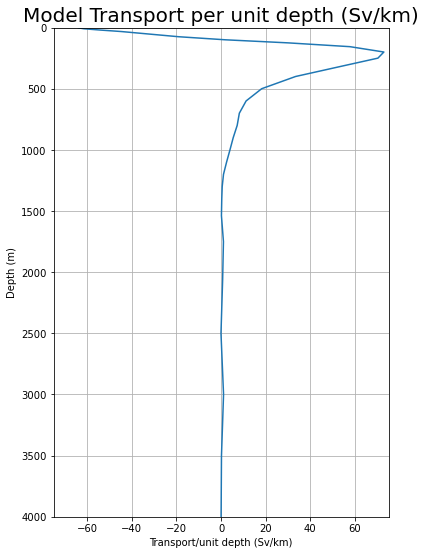

In [32]:
fig, ax = plt.subplots(figsize=(6,9))
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Transport/unit depth (Sv/km)')
ax.plot(trans_perdepth, lev[:30])           # this line will have transport vs depth
ax.grid(True)
ax.set_ylim(4000, 0)
ax.set_xlim(-75, 75)
plt.title('Model Transport per unit depth (Sv/km)', fontsize=20)
model_mp = plt.show()

## 8. Adding the observational Data

In [33]:
from scipy.io import loadmat
obs_data = loadmat('../Data/SolomonStrait_westernXsection_linear2bot_sat4surf.mat')

In [34]:
#along strait velocity saved in 255x99x590 matrix (depth x points along cross section x timestamps)
asv = obs_data['ASV']  #asv is in m/s

#lon: lon points along cross section, lat (same as lon), xdist: distance from start of cross section
lon = obs_data['bathy'][0][0][2][0]
lat = obs_data['bathy'][0][0][3][0]
xdist = obs_data['bathy'][0][0][4][0] #xdist is in km

#raw_time: datenums associated to each day mooring data was taken
raw_time = obs_data['time'][0]

#depth: array of all the depths possible
depth = obs_data['z'][:,0]  # depth is in m

I want to average the values of velocities across all time values stored in 'asv'. This 2d matrix, 'asv_avgtime' indexed by depth points (225 total) and points along cross-section will be in units of m/s still because it is just veolcity values.

In [35]:
asv_avgtime = np.mean(asv, axis=2)
asv_avgtime[np.isnan(asv_avgtime)]=0
asv_avgtime.shape

(225, 99)

To get the values of transport per unit depth for the observational data, I will have to use trapz to integrate along the cross section using xdist and the 99 values of velocity across all 225 depth levels. This will be stored in a 1d array of 225 values where each value is indexed by the depth level and will store the value of transport per unit depth (Sv/km). This is because 'xdist' is already in km.

In [36]:
obs_tpd = []
for i in range(asv_avgtime.shape[0]):
    vels_depth = asv_avgtime[i]          #vels_depth stores the i^th row of asv_avgtime (so the velocity values of that depth value)
    row_int = np.trapz(vels_depth, xdist)
    obs_tpd = np.append(obs_tpd, [row_int])

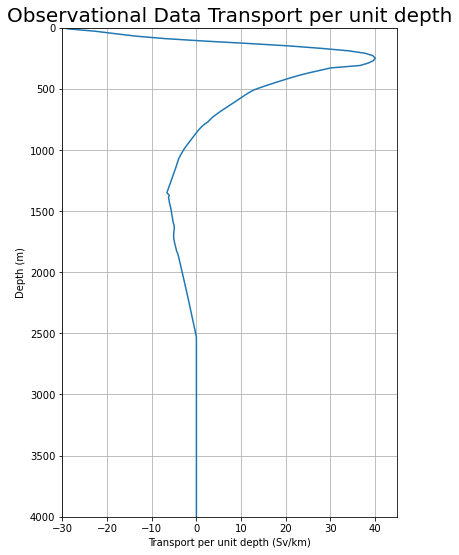

In [37]:
fig, ax = plt.subplots(figsize=(6,9))
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Transport per unit depth (Sv/km)')
ax.plot(obs_tpd, depth)           # this line will have transport vs depth
ax.grid(True)
ax.set_ylim(4000, 0)
ax.set_xlim(-30, 45)
plt.title('Observational Data Transport per unit depth', fontsize=20)
model_mp = plt.show()

have to multiply by the distance to the velocities (use xdist but the difference between each point instead of the distance from the first point of the cross section) -> remember this is in km not m
<br> averaging time first also makes it easier to then plot the mean velocity through strait
<br> use the trapezoidal integration method again to be consistent and because the u-v points on edge of grid instead of center of cells.
<br> keep track of units!! at every step! hepful in figuring out where I went wrong

## 9. Combined Plot

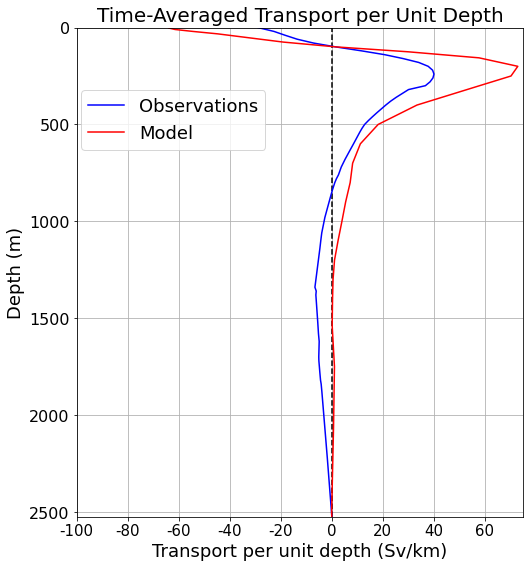

In [50]:
fig, ax = plt.subplots(figsize=(8,9))
label1 = 'Observations'
label2 = 'Model'
ax.set_ylabel('Depth (m)', fontsize=18)
ax.set_xlabel('Transport per unit depth (Sv/km)', fontsize=18)
ax.plot([0,0], [2525,0], 'k--')
ax.plot(obs_tpd, depth-10, 'b', label=label1)
ax.plot(trans_perdepth, lev[:30], 'r', label=label2)           # this line will have transport vs depth
ax.grid(True)
ax.set_ylim(2525, 0)
ax.set_xlim(-100, 75)
plt.xticks(np.arange(-100,76,20), np.arange(-100,76,20), color='k', size=15)
plt.yticks(np.arange(0,2525,500), np.arange(0,2525,500), color='k', size=16)
ax.legend(loc=(0.01, 0.75), fontsize=18)
plt.title('Time-Averaged Transport per Unit Depth', fontsize=20)
plt.savefig('mpcomp.png')

This plot tells me that on average, the observational data shows a greater bias of transport into the Solomon Strait from 0 to about 100 m and from 850 to 2500 m while showing a greater bias of transport out of the Solomon Strait from 100m to 850 m. These would be points of interest to look at the time series of. It would also be interesting to see what the deep water current at about 1500m looks like in the model data.

## Closing Clusters after use

In [39]:
client.close()
cluster.close()